## TASK
- Kamu diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. 

- Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. 


## Membuat model untuk menentukan layak tidaknya seorang costumer mendapat pinjaman

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from joblib import dump, load

## Data Wrangling

### Gathering Data

Mengumpulkan data yang dibutuhkan, serta melihat isi data teratas

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.shape

C:\Users\kocak\AppData\Local\Temp\ipykernel_14700\2657604290.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


(466285, 75)

In [3]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


### Assessing and Cleaning Data

- Menilai kualitas dari data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut. Seperti tipe kolom, adanya kosong/NA/Null, adanya duplikat, dll
- Membersihkan data tersebut sehingga siap untuk dijadikan input dan output pembuatan model

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

Dapat diketahui terdapat kolom yang mempunyai full data kosong di dalamnya, sehingga kolom ini tidak dibutuhkan (tidak memberi informasi)

In [7]:
df.dropna(axis=1, how='all', inplace=True)

In [8]:
df.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124435
purpose                            14
title                           63098
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

Dapat diketahui bahwa panjang row sebesar 466285, yang juga menunjukan tiap-tiap baris mewakili sebuah individu, yang mana kolom seperti ini tidak digunakan sebagai fitur, selain itu kolom2 di bawah ini juga akan di drop

- desc=berupa penjelasan alasan meminjam
- sub grade = tidak diketahui 
- emp_title = berupa nama peminjam (205475 unik value)
- pymnt_plan = sangat didominasi oleh 1 value (2 unik value)
- title =  terlalu banyak value unik (63098 unik value)
- zip_code = nilai-nilai konstan
- addr_state =  hanya berupa alamat
- title = hanya berupa judul
- policy_code = Hanya terdiri 1 nilai/kategori
- application_type =  Hanya terdiri 1 nilai/kategori
- acc_now_delinq = Sangat didominasi oleh 1 nilai
- next_pymnt_d = Dirasa tidak terlalu berguna sebagai fitur

In [9]:
drop2 = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'sub_grade', 'emp_title', 
         'pymnt_plan', 'zip_code', 'addr_state', 'title', 'policy_code', 'application_type', 'acc_now_delinq', 'next_pymnt_d']
df.drop(columns=drop2, inplace=True)

In [10]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [11]:
df_time = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in df_time:
    df[i] = pd.to_datetime(df[i], format='%b-%y')

df.select_dtypes('datetime64').describe()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
count,466285,466256,465909,466243
mean,2013-08-23 15:33:29.494623232,1997-12-16 11:57:43.058920192,2015-04-23 05:05:48.379619584,2015-08-30 16:56:26.436685824
min,2007-06-01 00:00:00,1969-01-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
25%,2013-03-01 00:00:00,1994-03-01 00:00:00,2015-01-01 00:00:00,2015-11-01 00:00:00
50%,2014-01-01 00:00:00,1999-03-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00
75%,2014-07-01 00:00:00,2002-09-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
max,2014-12-01 00:00:00,2068-12-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00


In [12]:
df['end_date'] = pd.to_datetime('2017-12-01')

In [13]:
df['mths_since_earliest_cr_line'] = df['end_date'].dt.to_period('M').astype('int64') - \
    df['earliest_cr_line'].dt.to_period('M').astype('int64')
df.drop(columns='earliest_cr_line', inplace=True)

In [14]:
df['mths_since_issue_d'] = df['end_date'].dt.to_period('M').astype('int64') - \
    df['issue_d'].dt.to_period('M').astype('int64')
df.drop(columns='issue_d', inplace=True)

In [15]:
df['mths_since_last_pymnt_d'] = df['end_date'].dt.to_period('M').astype('int64') - \
    df['last_pymnt_d'].dt.to_period('M').astype('int64')
df.drop(columns='last_pymnt_d', inplace=True)

In [16]:
df['mths_since_last_credit_pull_d'] = df['end_date'].dt.to_period('M').astype('int64') - \
    df['last_credit_pull_d'].dt.to_period('M').astype('int64')
df.drop(columns='last_credit_pull_d', inplace=True)

In [17]:
df.drop(columns='end_date', inplace=True)

In [18]:
df[['mths_since_earliest_cr_line','mths_since_issue_d' ,'mths_since_last_pymnt_d','mths_since_last_credit_pull_d']].describe(include="all")

,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
count,4.662850e+05,466285.000000,4.662850e+05,4.662850e+05
mean,-5.736358e+14,51.255187,-7.437485e+15,-8.307829e+14
std,7.273609e+16,14.340154,2.618082e+17,8.753254e+16
min,-9.223372e+18,36.000000,-9.223372e+18,-9.223372e+18
25%,1.830000e+02,41.000000,2.300000e+01,2.300000e+01
50%,2.250000e+02,47.000000,2.400000e+01,2.300000e+01
75%,2.850000e+02,57.000000,3.500000e+01,2.500000e+01
max,5.870000e+02,126.000000,1.200000e+02,1.270000e+02


Perbaikan nilai mines, pada jumlah bulan

In [19]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()
df.loc[df['mths_since_last_pymnt_d']<0, 'mths_since_last_pymnt_d'] = df['mths_since_last_pymnt_d'].max()
df.loc[df['mths_since_last_credit_pull_d']<0, 'mths_since_last_credit_pull_d'] = df['mths_since_last_credit_pull_d'].max()


In [20]:
df[['mths_since_earliest_cr_line','mths_since_issue_d' ,'mths_since_last_pymnt_d','mths_since_last_credit_pull_d']].describe(include="all")

,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
count,466285.000000,466285.000000,466285.000000,466285.000000
mean,242.406807,51.255187,31.365899,27.054591
std,86.500323,14.340154,13.049949,9.682568
min,73.000000,36.000000,23.000000,23.000000
25%,184.000000,41.000000,23.000000,23.000000
50%,226.000000,47.000000,24.000000,23.000000
75%,285.000000,57.000000,35.000000,25.000000
max,587.000000,126.000000,120.000000,127.000000


In [21]:
df.emp_length.value_counts()

emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: count, dtype: int64

In [22]:
def emp_to_num(x):
    if x == '10+ years':
        return 10
    elif x == '2 years':
        return 2
    elif x == '3 years':
        return 3
    elif x == '< 1 year':
        return 0
    elif x == '5 years':
        return 5
    elif x == '1 year':
        return 1
    elif x == '4 years':
        return 4
    elif x == '7 years':
        return 7
    elif x == '6 years':
        return 6
    elif x == '8 years':
        return 8
    elif x == '9 years':
        return 9

df.emp_length = df.emp_length.apply(emp_to_num)

In [23]:
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [24]:
def grade_to_num(x):
    if x == 'A':
        return 6
    elif x == 'B':
        return 5
    elif x == 'C':
        return 4
    elif x == 'D':
        return 3
    elif x == 'E':
        return 2
    elif x == 'F':
        return 1
    elif x == 'G':
        return 0
df.grade = df.grade.apply(grade_to_num)
df.grade

0         5
1         4
2         4
3         4
4         5
         ..
466280    4
466281    3
466282    3
466283    6
466284    3
Name: grade, Length: 466285, dtype: int64

In [25]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [26]:
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}

df["home_ownership"] = df["home_ownership"].map(target_dict)

In [27]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

TARGET / LABEL model

In [28]:
#TARGET
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

- Good Loan (1) : Fully Paid, Does not meet the credit policy. Status:Fully Paid
- Bad Loan (0) : Charged Off, Does not meet the credit policy. Status:Charged Off, Default, Late (31-120 days)
- Jenis Loan yang belum dapat di nilai mutunya / belum pasti (dull) : Current, In Grace Period, Late (16-30 days) <-- jenis loan ini akan di drop nantinya


In [29]:
def status_to_target(x):
    if x in ['Fully Paid','Does not meet the credit policy. Status:Fully Paid',]:
        return 1
    elif x in ['Charged Off','Does not meet the credit policy. Status:Charged Off','Default,Late (31-120 days)']:
        return 0
    else:
        return 'dull'
df.loan_status = df.loan_status.apply(status_to_target)

In [30]:
df = df.loc[~df['loan_status'].isin(['dull'])].reset_index(drop=True)

### Perbaikan Missing Value Secara Keseluruhan

In [31]:
df.isnull().sum()

loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
emp_length                         8707
home_ownership                        0
annual_inc                            4
verification_status                   0
loan_status                           0
purpose                               0
dti                                   0
delinq_2yrs                          29
inq_last_6mths                       29
mths_since_last_delinq           129258
mths_since_last_record           202458
open_acc                             29
pub_rec                              29
revol_bal                             0
revol_util                          226
total_acc                            29
initial_list_status                   0
out_prncp                             0


In [32]:
df.shape

(229963, 43)

- emp_length: sebenarnya merupakan kolom untuk pengkategorian yang telah diubah menjadi numerik, sehingga di isikan nilai mode
- annual_inc: hanya berupa 4 missing value, dan berupa numerik, banyak nilai yang mendominasi,  sehingga diisikan nilai mean
- delinq_2yrs: berupa 29 missing value, dan merupakan kolom untuk pengkategorian, sehingga diisikan nilai mode
- inq_last_6mths: Diisikan dengan nilai mode
- mths_since_last_delinq: berupa 129258 missing value, didominasi sangat banyak oleh 0, sehingga dijadikan 0
- mths_since_last_record: 202458 missing value, terlalu banyak missing value, sehingga kolom ini dihilangkan
- open_acc: berupa 29 missing value, data numerik, banyak nilai yang sama-sama mendominasi, sehingga diisikan nilai mean
- pub_rec: Public record,merupakan data numerik yang didominasi nilai 0. sehingga dijadikan 0
- revol_util: 226 missing value, nilai numerik, denga nilai 0 cukup mendominasi, sehingga dijadikan 0
- total_acc: 29 missing value, berupa data numerik, banyak nilai tengah yang mendominasi, sehingga diisikan mode
- collections_12_mths_ex_med: 145 nilai kosong dianggap tidak ada atau bernilai 0
- mths_since_last_major_derog: 189945 missing value, terlalu banyak missing value, sehingga klom ini dihilangkan
- tot_coll_amt: merupakan data numerik yang didominasi nilai 0. sehingga diisikan nilai 0
- tot_cur_bal: Merupakan data numerik dengan tidak ada nilai yang terlalu mendominasi, sehingga diisikan nilai mean
- total_rev_hi_lim: Diisikan dengan nilai yang mendominasi

In [33]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].mode()[0], inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].mode()[0], inplace=True)
df['mths_since_last_delinq'].fillna(0, inplace=True)
df.drop(columns='mths_since_last_record', inplace=True)
df['open_acc'].fillna(df['open_acc'].mean(), inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['total_acc'].fillna(df['total_acc'].mode()[0], inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df.drop(columns='mths_since_last_major_derog', inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].mode()[0], inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean(), inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mode()[0], inplace=True)

In [34]:
df.term.value_counts()

term
 36 months    180994
 60 months     48969
Name: count, dtype: int64

In [35]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,5,10.0,RENT,24000.0,...,0.00,171.62,0.0,0.0,137352.137175,13500.0,395,72,35,23
1,2500,2500,2500.0,60 months,15.27,59.83,4,0.0,RENT,30000.0,...,1.11,119.66,0.0,0.0,137352.137175,13500.0,224,72,56,51


### EDA And Data Preparation

In [36]:
df.corr(numeric_only=True)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
loan_amnt,1.000000,0.997189,0.988363,0.209613,0.955922,-0.197259,0.104480,0.349318,0.058621,0.010744,...,0.131152,0.563430,-0.000105,-0.001142,0.269833,0.326363,0.157305,-0.158286,-0.120394,-0.067360
funded_amnt,0.997189,1.000000,0.991800,0.211528,0.960168,-0.196898,0.105428,0.348160,0.060698,0.011594,...,0.131596,0.566499,0.000302,-0.001102,0.270700,0.330020,0.155123,-0.168954,-0.127854,-0.072622
funded_amnt_inv,0.988363,0.991800,1.000000,0.214263,0.951395,-0.189622,0.111418,0.343311,0.067320,0.012417,...,0.127441,0.569606,0.001395,-0.000977,0.269265,0.335194,0.149660,-0.213597,-0.173026,-0.103090
int_rate,0.209613,0.211528,0.214263,1.000000,0.200862,-0.943932,0.033801,-0.018586,0.170015,0.102906,...,0.119367,0.129299,0.030344,0.001687,-0.092881,-0.086861,-0.097359,-0.179119,-0.066058,-0.071120
installment,0.955922,0.960168,0.951395,0.200862,1.000000,-0.178472,0.094184,0.346084,0.061074,0.023105,...,0.118420,0.507158,0.001950,-0.000681,0.242783,0.309848,0.139719,-0.161734,-0.125829,-0.078956
grade,-0.197259,-0.196898,-0.189622,-0.943932,-0.178472,1.000000,-0.016017,0.009965,-0.138488,-0.098890,...,-0.122986,-0.116549,-0.029084,-0.001163,0.077704,0.092955,0.085633,0.092025,-0.017128,0.010950
emp_length,0.104480,0.105428,0.111418,0.033801,0.094184,-0.016017,1.000000,0.058945,0.059929,0.028570,...,0.014813,0.090296,0.006923,-0.001827,0.071769,0.094361,0.242431,-0.131933,-0.110368,-0.085651
annual_inc,0.349318,0.348160,0.343311,-0.018586,0.346084,0.009965,0.058945,1.000000,-0.175453,0.055676,...,0.022795,0.233214,0.005524,0.002229,0.393752,0.273081,0.165969,-0.041114,-0.025112,-0.016326
dti,0.058621,0.060698,0.067320,0.170015,0.061074,-0.138488,0.059929,-0.175453,1.000000,-0.000604,...,0.043742,0.017136,0.004082,-0.002572,-0.014657,0.099373,0.019971,-0.180407,-0.152988,-0.140491
delinq_2yrs,0.010744,0.011594,0.012417,0.102906,0.023105,-0.098890,0.028570,0.055676,-0.000604,1.000000,...,0.017185,0.020391,0.040811,-0.000163,0.061997,-0.010411,0.083692,-0.080803,-0.049239,-0.038468


C:\Users\kocak\AppData\Local\Temp\ipykernel_14700\2146690496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, 'loan_amnt'], hist=True, kde=True, rug=False,


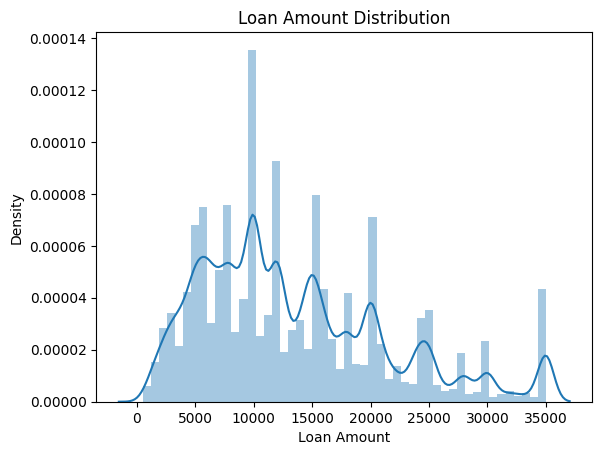

In [37]:
sns.distplot(df.loc[:, 'loan_amnt'], hist=True, kde=True, rug=False,
             norm_hist=True, axlabel='Loan Amount')
plt.title('Loan Amount Distribution')
plt.show()

C:\Users\kocak\AppData\Local\Temp\ipykernel_14700\4060431287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="loan_status", y="loan_amnt", data=loan_status1, palette=['#D04848','#6895D2'])


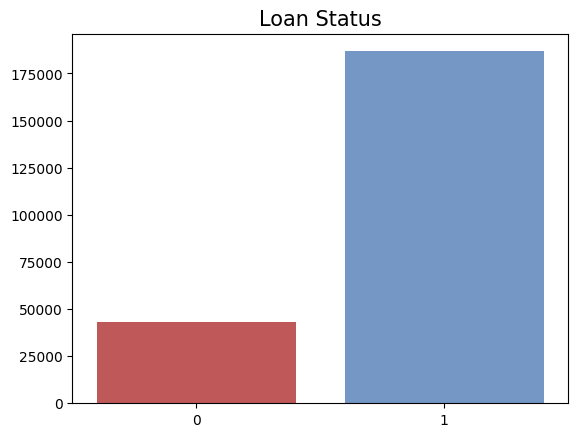

In [38]:
loan_status1 = df.groupby(by='loan_status').agg({'loan_amnt':'count'}).reset_index()

sns.barplot(x="loan_status", y="loan_amnt", data=loan_status1, palette=['#D04848','#6895D2'])
plt.title("Loan Status", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

#loan status 1 (good loan) mendominasi, sehingga harus dilakukan penyesuaian jumlah sampel untuk kedua kelas ini

### Memisahkan Fitur dan Target

In [39]:
X = df.drop('loan_status', axis=1)
y = df.loan_status

### Melakukan one-hot encoding

In [40]:
object_cols = X.select_dtypes(include=['object']).columns

X_encoded = pd.get_dummies(X, columns=object_cols, dtype=int)

In [41]:
X_encoded

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,5000,5000,4975.0,10.65,162.87,5,10.0,24000.0,27.65,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,4,0.0,30000.0,1.00,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2400,2400,2400.0,15.96,84.33,4,10.0,12252.0,8.72,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000,10000,10000.0,13.49,339.31,4,10.0,49200.0,20.00,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5000,5000,5000.0,7.90,156.46,6,3.0,36000.0,11.20,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229958,8525,8525,8525.0,18.25,217.65,3,5.0,37536.0,12.28,4.0,...,0,1,0,0,0,0,0,0,1,0
229959,18000,18000,17975.0,7.90,563.23,6,3.0,90000.0,10.33,1.0,...,0,0,0,0,0,0,0,0,1,0
229960,10000,10000,10000.0,18.25,362.78,3,10.0,42000.0,11.57,0.0,...,0,0,0,0,0,0,1,0,1,0
229961,22000,22000,22000.0,19.97,582.50,3,10.0,78000.0,18.45,0.0,...,0,0,0,0,0,0,0,0,1,0


### Melakukan Standardisasi

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [43]:
X_scaled

array([[-1.04529351, -1.04280674, -1.02444902, ..., -0.09390211,
         0.57591921, -0.57591921],
       [-1.35619248, -1.35471241, -1.33176496, ..., -0.09390211,
         0.57591921, -0.57591921],
       [-1.36862843, -1.36718863, -1.34418176, ..., -0.09390211,
         0.57591921, -0.57591921],
       ...,
       [-0.42349559, -0.41899541, -0.40050455, ..., -0.09390211,
         0.57591921, -0.57591921],
       [ 1.06881943,  1.07815177,  1.08951211, ..., -0.09390211,
         0.57591921, -0.57591921],
       [-1.41837227, -1.41709354, -1.39384898, ..., -0.09390211,
        -1.73635465,  1.73635465]])

### Undersampling Good Loan (1) agar berjumlah sama dengan Bad Loan (0)

In [44]:
y = y.astype(int)
y.value_counts()

loan_status
1    186727
0     43236
Name: count, dtype: int64

In [45]:
from imblearn.under_sampling import RandomUnderSampler

X = X_scaled
y = y

class_counts = y.value_counts()

min_class_count = min(class_counts)

rus = RandomUnderSampler(sampling_strategy={0: min_class_count, 1: min_class_count}, random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [46]:
X_resampled

array([[-0.41105963, -0.40651919, -0.38808774, ..., -0.09390211,
        -1.73635465,  1.73635465],
       [-0.54785517, -0.54375768, -0.530881  , ..., -0.09390211,
         0.57591921, -0.57591921],
       [-0.92093393, -0.91804448, -0.90338517, ..., -0.09390211,
         0.57591921, -0.57591921],
       ...,
       [ 2.68549403,  2.70006123,  2.70369682, ..., -0.09390211,
        -1.73635465,  1.73635465],
       [ 0.82010026,  0.82862724,  0.841176  , ..., -0.09390211,
        -1.73635465,  1.73635465],
       [-1.21939693, -1.21747391, -1.1951801 , ..., -0.09390211,
        -1.73635465,  1.73635465]])

In [47]:
y_resampled.value_counts()

loan_status
0    43236
1    43236
Name: count, dtype: int64

### Melakukan Permodelan untuk klasifikasi biner dengan Logistic Regression

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9938710610002891
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8624
           1       0.99      1.00      0.99      8671

    accuracy                           0.99     17295
   macro avg       0.99      0.99      0.99     17295
weighted avg       0.99      0.99      0.99     17295



### Menyimpan Model

In [51]:
# Menyimpan model
dump(model, 'logistic_regression_model.joblib')

# Memuat model
loaded_model = load('logistic_regression_model.joblib')

# Menggunakan model yang sudah dimuat
loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])